In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 


In [3]:
import os
from typing import List

def get_file_list(data_folder_path: str) -> List[str]:
    file_lst = []
    
    # Get all files in the directory
    for root, _, files in os.walk(data_folder_path):
        for file in files:
            if file.endswith('.csv',):  # Only consider CSV files
                file_path = os.path.join(root, file)
                # Append file path and its modification time
                file_lst.append(file_path)


    # Extract just the file paths
    return file_lst

In [4]:
file_list = get_file_list("data")
file_list

['data/sheet10.csv',
 'data/sheet11.csv',
 'data/sheet8.csv',
 'data/sheet9.csv',
 'data/sheet7.csv']

In [5]:
data7 = pd.read_csv(file_list[4])
data8 = pd.read_csv(file_list[2])
data9 = pd.read_csv(file_list[3])
data10 = pd.read_csv(file_list[0])
data11 = pd.read_csv(file_list[1])


In [1]:
column_mapping = {
    'T1': 'Ambient',
    'T2': 'Bed Reference',
    'T3': 'Bearing Front left Side',
    'T4': 'Bearing Front Right Side',
    'T5': 'Bearing Rear left Side',
    'T6': 'Bearing Rear Right Side',
    'T7': 'I bolt Hole',
    'T8': 'Spindle Housing Bed (bottom)',
    'T9': 'Z Axis Servo motor mounting plate',
    'T10': 'Spindle motor',
    'T11': 'Lubrication Oil',
    'T12': 'Z Axis ball Screw Housing',
    'T13': 'X Axis ball Screw Housing',
    'T14': 'Hydraulic Tank',
    'T15': 'Coolant Tank'
}

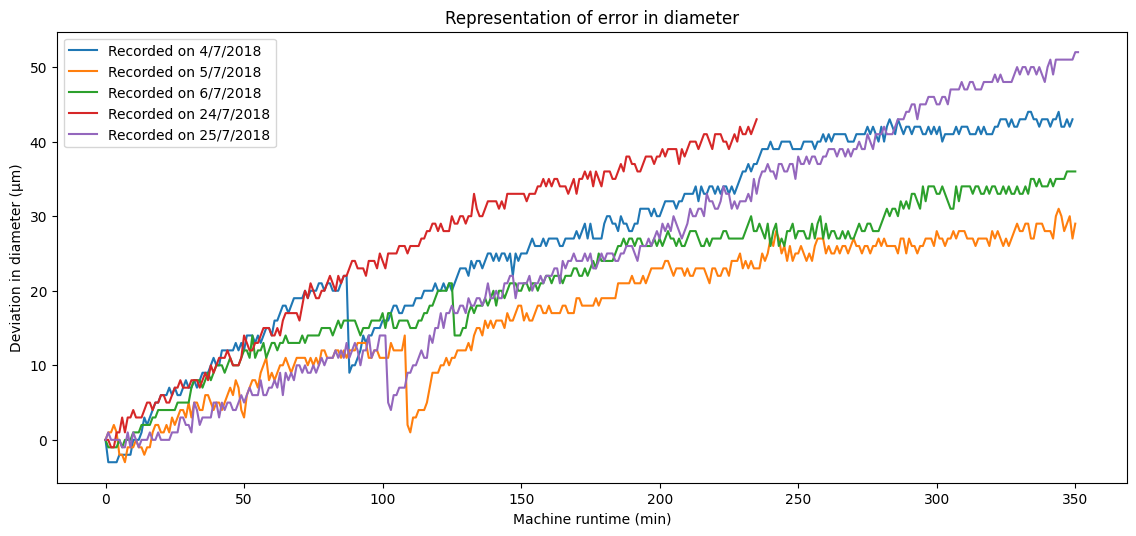

In [7]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data (each as a separate line)
ax.plot(data7['Del'], label="Recorded on 4/7/2018")
ax.plot(data8['Del'], label="Recorded on 5/7/2018")
ax.plot(data9['Del'], label="Recorded on 6/7/2018")
ax.plot(data10['Del'], label="Recorded on 24/7/2018")
ax.plot(data11['Del'], label="Recorded on 25/7/2018")

# Set axis labels and title
ax.set_xlabel("Machine runtime (min)", fontsize=10)
ax.set_ylabel("Deviation in diameter (µm)", fontsize=10)
ax.set_title("Representation of error in diameter")

# Add a legend to distinguish lines
ax.legend()

# Adjust layout and show the plot
plt.tight_layout(pad=3)
plt.show()

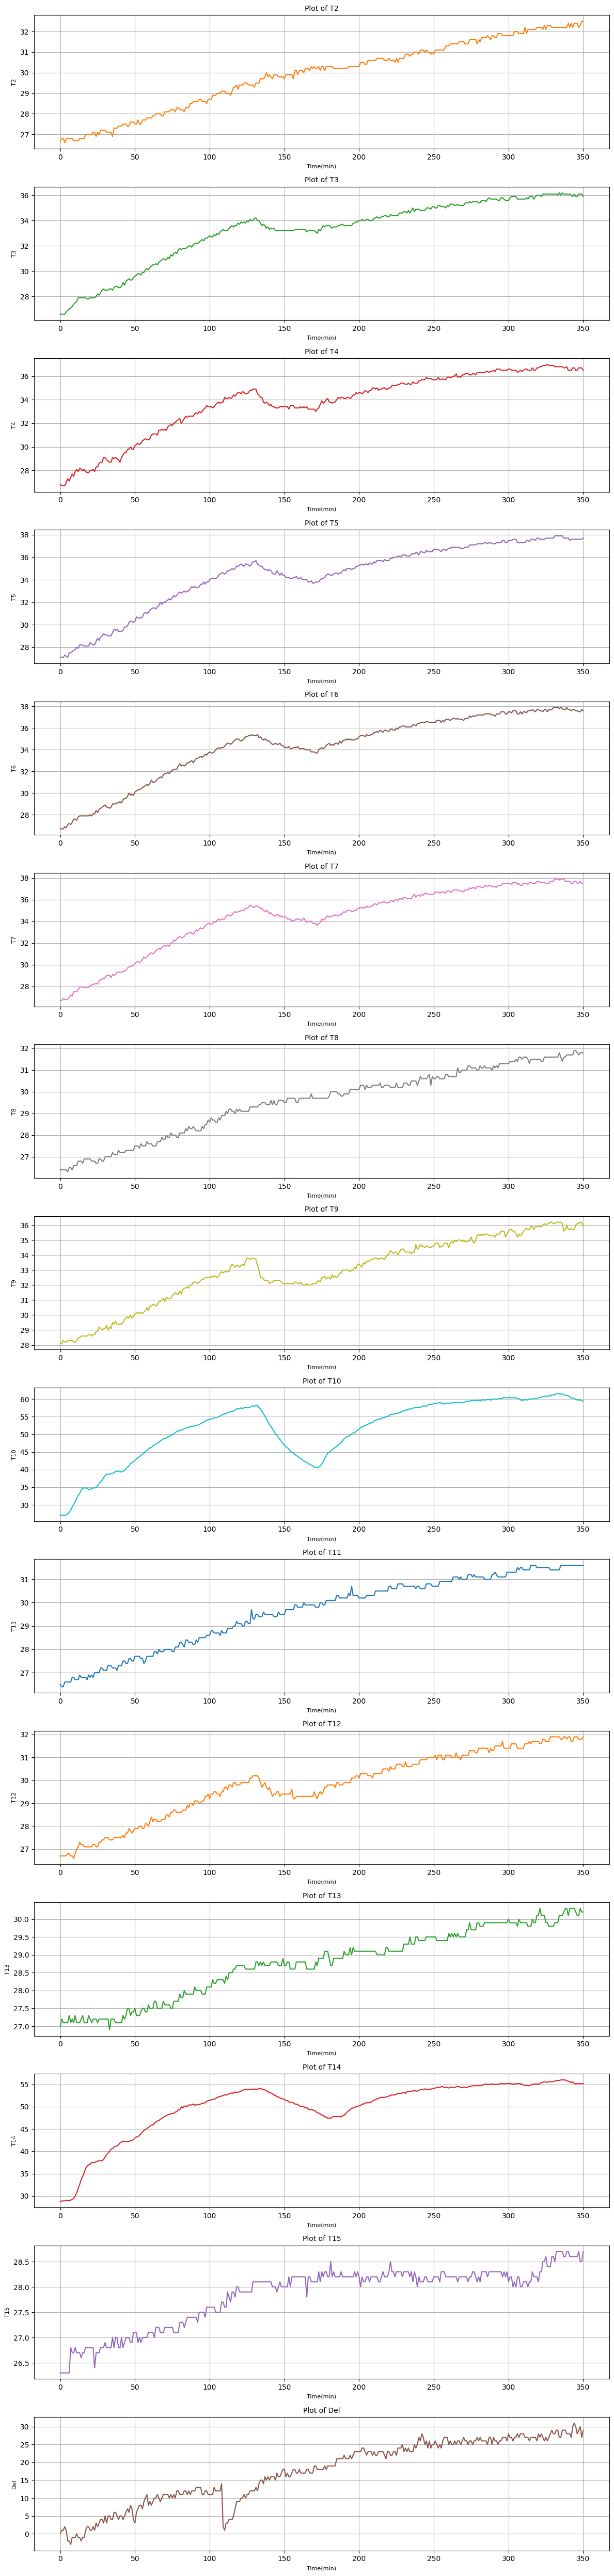

In [8]:
plt.figure(figsize=(12, 50))
df = data8
# Create subplots for each column except the index (e.g., Date)
for idx, column in enumerate(df.columns[1:], start=1):
    plt.subplot(len(df.columns) - 1, 1, idx)
    plt.plot(df[column], label=column, color=f'C{idx}')  # Use C{idx} for automatic color cycling

    plt.title(f"Plot of {column}", fontsize=10)
    plt.xlabel("Time(min)", fontsize=8)
    # plt.sharex()
    plt.ylabel(column, fontsize=8)
    plt.tight_layout()
    plt.grid(True)

In [12]:
corr_ = data11.corr()

In [13]:
#!pip install seaborn


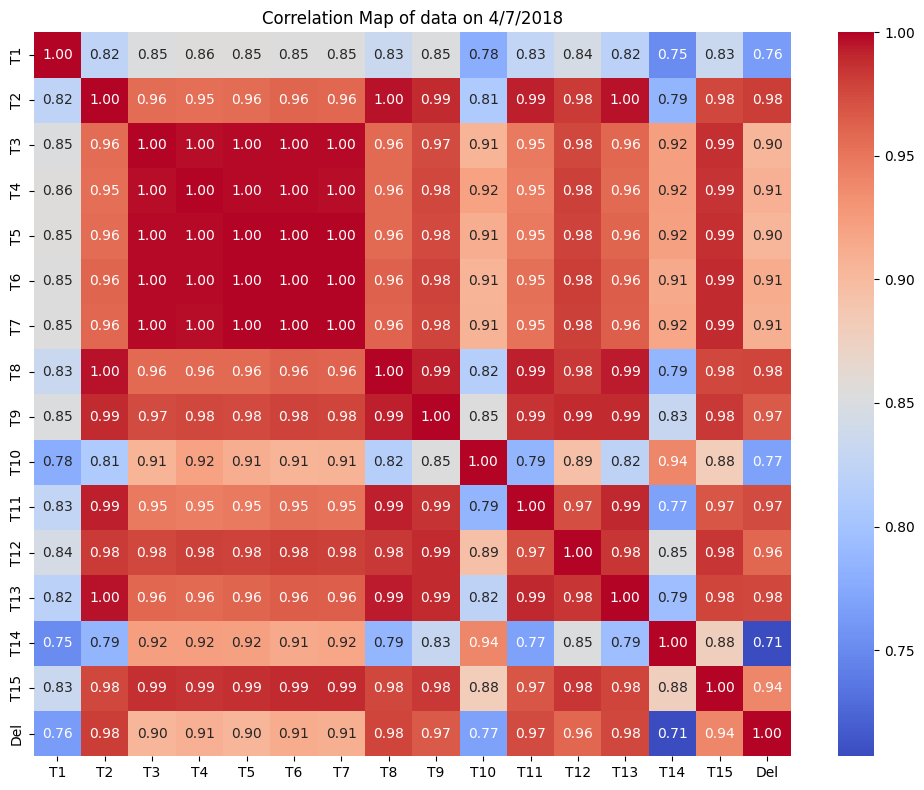

In [15]:
import seaborn as sns
plt.figure(figsize=(10,8))

# Create a heatmap
sns.heatmap(
    corr_, 
    annot=True,         # Annotate with the correlation values
    fmt=".2f",          # Format the annotation to 2 decimal places
    cmap="coolwarm",    # Use a diverging color palette
    cbar=True           # Show color bar
)

# Add title
plt.title("Correlation Map of data on 4/7/2018", fontsize=12)

# Show plot
plt.tight_layout()
plt.savefig("corr.png")
plt.show()

Above graph shows high corrlation between temperature points on the machine